In [1]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
import ubyte
import idx2numpy

from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda


In [2]:
# This is the code to convert a ubyte data to images and labels to a directory

# # ubyte.decode_idx3_ubyte("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte")
# import os
# import numpy as np
# from PIL import Image

# def ubyte_to_images(ubyte_file, label_file, output_folder, image_size=(28, 28)):
#     """
#     Convert ubyte image data to individual image files.
    
#     Args:
#         ubyte_file (str): Path to the .ubyte file containing images.
#         label_file (str): Path to the .ubyte file containing labels.
#         output_folder (str): Directory to save the extracted images.
#         image_size (tuple): The size of each image (e.g., (28, 28) for MNIST).
#     """
#     # Create output folder if it doesn't exist
#     os.makedirs(output_folder, exist_ok=True)

#     # Read image data
#     with open(ubyte_file, 'rb') as img_file:
#         img_file.read(16)  # Skip the header
#         images = np.frombuffer(img_file.read(), dtype=np.uint8)
#         images = images.reshape(-1, *image_size)

#     # Read label data
#     with open(label_file, 'rb') as lbl_file:
#         lbl_file.read(8)  # Skip the header
#         labels = np.frombuffer(lbl_file.read(), dtype=np.uint8)

#     # Save images to the output folder
#     for idx, (image, label) in enumerate(zip(images, labels)):
#         # Create label folder
#         label_folder = os.path.join(output_folder, str(label))
#         os.makedirs(label_folder, exist_ok=True)

#         # Save image as PNG
#         img = Image.fromarray(image)
#         img.save(os.path.join(label_folder, f"{idx}.png"))

#     print(f"Images successfully saved to {output_folder}")

# # Example usage
# ubyte_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte'  # Replace with your .ubyte image file
# label_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte'  # Replace with your .ubyte label file
# output_directory = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_train'          # Replace with your desired output folder

# ubyte_to_images(ubyte_file_path, label_file_path, output_directory)

# ubyte_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte'  # Replace with your .ubyte image file
# label_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte'  # Replace with your .ubyte label file
# output_directory = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_test'          # Replace with your desired output folder

# ubyte_to_images(ubyte_file_path, label_file_path, output_directory)


In [3]:
num_classes = 10

In [4]:
# This is the way to download dataset from prebuilt datasets of pytorch

# train_data = datasets.FashionMNIST(
#     root="/home/abhinav/Documents/Work/2 Hobby_projects/AIProjects/Pytorch/Data/FashionMNIST/raw/train-images-idx3-ubyte",
#     train=True,
#     download=False,
#     transform=ToTensor(),
#     target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
# )

# test_data = datasets.FashionMNIST(
#     root="Data/FashionMNIST",
#     train=False,
#     download=False,
#     transform=ToTensor()
# )

In [5]:
# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [6]:
# train_data = CustomImageDataset("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte", 
#                                 "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte", 
#                                 ToTensor(),
#                                 Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
#                                 )

# test_data = CustomImageDataset("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte", 
#                                 "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte", 
#                                 ToTensor(),
#                                 Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
#                                 )

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [8]:
train_dataset_dir = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_train'
test_dataset_dir = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_test'

transform = transforms.Compose([
    # transforms.Resize((128, 128)),  # Resize images to 128x128 (change as needed)
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images (adjust mean/std as needed)
])

target_transform = Lambda(lambda y: torch.zeros(num_classes, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

train_data = datasets.ImageFolder(root=train_dataset_dir, transform=transform, target_transform=target_transform)
test_data = datasets.ImageFolder(root=test_dataset_dir, transform=transform, target_transform=target_transform)

In [9]:
print("len of train data: ", len(set(train_data)))
print("len of first unit of train data: ", len(train_data[0]))
print("The first part is image, and the second part is label")

len of train data:  60000
len of first unit of train data:  2


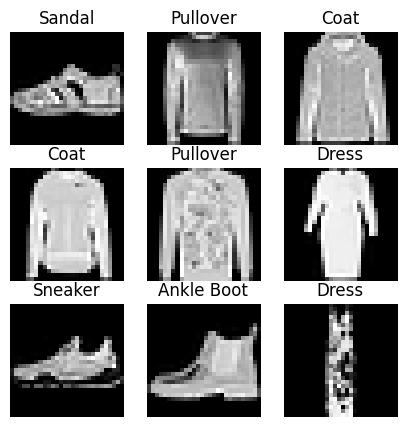

In [14]:
figure = plt.figure(figsize=(5, 5))

cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(train_data), size=(1, )).item()
    img, label = train_data[sample_idx]
    img = img[0]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[torch.argmax(label).item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="grey")
plt.show()


In [11]:
# Preparing data for training using DataLoaders

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


First method:
Batch of Images: torch.Size([64, 3, 28, 28])
Batch of Labels: 64
Second method:
size of train_features:  64
size of labels:  64
shape of img:  torch.Size([28, 28])
label:  9


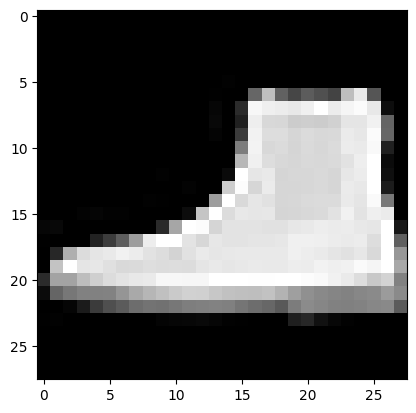

In [12]:
# First way of iterating

print("First method:")
for images, labels in train_dataloader:
    print(f"Batch of Images: {images.shape}")  # (batch_size, channels, height, width)
    print(f"Batch of Labels: {len(labels)}")       # Corresponding labels

    # for i in range(len(images)):
    #     print("image: ", images[i].shape)
    #     print("label: ", labels[i])
    break

# Second way of iterating

print("Second method:")
train_features, train_labels = next(iter(train_dataloader))
print("size of train_features: ", len(train_features))
print("size of labels: ", len(train_labels))
print("shape of img: ", img.shape)
img = torch.mean(train_features[0].squeeze(), dim=0)
label = train_labels[0]
print("label: ", torch.argmax(label).item())
plt.imshow(img, cmap="grey")
plt.show()

In [13]:
# Learn the reason why this creates an error

# train_features, train_labels = next(iter(train_dataloader))
# print("size of train_features: ", len(train_features))
# print("size of labels: ", len(train_labels))

# img = train_features[0].squeeze()
# label = train_labels[0]
# print("label: ", labels_map[label])
# plt.imshow(img, cmap="grey")
# plt.show()